# The Psychological Toll of Social Media on Mental Health of Young Adults

## Importing Libraries

In [365]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [366]:
data = pd.read_csv("smmh.csv")

In [367]:
data.head()

,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [368]:
data.shape


(486, 20)

## Preprocessing Data

In [369]:
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Sex','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [370]:
titles = list(data.columns)
titles

['Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [371]:
#rearranging ADHD and anxiety question columns so that they are sequential

titles[10], titles[11] = titles[11], titles[10]
titles[11], titles[13] = titles[13], titles[11]
titles[12], titles[13] = titles[13], titles[12]
data = data[titles]
titles

['Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [372]:
gender = set(data.get("Sex"))
gender

{'Female',
 'Male',
 'NB',
 'Non binary ',
 'Non-binary',
 'Nonbinary ',
 'There are others???',
 'Trans',
 'unsure '}

In [373]:
data.drop(data.loc[data['Sex'] =='There are others???'].index, inplace=True)
data.replace('Non-binary','Others', inplace=True)
data.replace('Nonbinary ','Others', inplace=True)
data.replace('NB','Others', inplace=True)
data.replace('unsure ','Others', inplace=True)
data.replace('Non binary ','Others', inplace=True)
data.replace('Trans','Others', inplace=True)

In [374]:
gender = set(data.get("Sex"))
gender

{'Female', 'Male', 'Others'}

In [375]:
data.loc[382,"Age"]

np.float64(26.7)

In [376]:
data['Age'] = data['Age'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 0 to 485
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  485 non-null    int64 
 1   Sex                  485 non-null    object
 2   Relationship Status  485 non-null    object
 3   Occupation           485 non-null    object
 4   Affiliations         455 non-null    object
 5   Social Media User?   485 non-null    object
 6   Platforms Used       485 non-null    object
 7   Time Spent           485 non-null    object
 8   ADHD Q1              485 non-null    int64 
 9   ADHD Q2              485 non-null    int64 
 10  ADHD Q3              485 non-null    int64 
 11  ADHD Q4              485 non-null    int64 
 12  Anxiety Q1           485 non-null    int64 
 13  Anxiety Q2           485 non-null    int64 
 14  Self Esteem Q1       485 non-null    int64 
 15  Self Esteem Q2       485 non-null    int64 
 16  Self Esteem Q

In [377]:
data.loc[382,"Age"]

np.int64(26)

In [378]:
#removing data of individuals aged above 30 years
data = data[data['Age'] <= 30]
data.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1


In [379]:
Affiliations = set(data.get("Affiliations"))
data['Affiliations'] = data['Affiliations'].fillna('Unknown')
Affiliations


{'Company',
 'Company, Private',
 'Corporate',
 'Educational institution',
 'Goverment',
 'Other (please specify)',
 'Private',
 'School',
 'School, Company',
 'School, N/A',
 'School, Private',
 'School, University',
 'School, University, Private',
 'University',
 'University, Company',
 'University, Company, Goverment',
 'University, Company, Private',
 'University, Goverment',
 'University, Goverment, Private',
 'University, N/A',
 'University, Private',
 nan}

In [380]:
data.describe()

,Age,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,21.994949,3.664141,3.479798,3.484848,3.446970,2.671717,3.770202,2.919192,2.750000,2.500000,3.494949,3.320707,3.328283
std,2.846268,1.034017,1.271736,1.123860,1.256765,1.254181,1.192899,1.419051,1.050919,1.247783,1.216958,1.218289,1.436701
min,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,3.000000,2.750000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000
50%,22.000000,4.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000
75%,23.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,4.000000,3.000000,3.000000,5.000000,4.000000,5.000000
max,30.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [381]:
data.median(numeric_only = True)

Age               22.0
ADHD Q1            4.0
ADHD Q2            4.0
ADHD Q3            3.0
ADHD Q4            4.0
Anxiety Q1         3.0
Anxiety Q2         4.0
Self Esteem Q1     3.0
Self Esteem Q2     3.0
Self Esteem Q3     2.0
Depression Q1      4.0
Depression Q2      3.0
Depression Q3      4.0
dtype: float64

In [382]:
#setting scores of 3,4 and 5 to 0.
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 0
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 0
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 0
#Setting scores of '1' to '4' and '2' to '2'.
data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 2

In [383]:
data.tail(2)

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
484,21,Male,In a relationship,Student,Educational institution,Yes,"Instagram, Snapchat, YouTube, LinkedIn",Between 2 and 3 hours,4,2,3,2,1,4,1,4,1,5,2,2
485,24,Female,In a relationship,Student,Educational institution,Yes,"Instagram, Facebook, Snapchat, YouTube, LinkedIn",Between 3 and 4 hours,3,2,2,2,2,3,2,0,3,3,2,1


In [384]:
# Convert ADHD, Anxiety, Self Esteem, and Depression columns to numeric, coercing errors
ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data[ADHD] = data[ADHD].apply(pd.to_numeric, errors='coerce')

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data[Anxiety] = data[Anxiety].apply(pd.to_numeric, errors='coerce')


SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3']
data[SelfEsteem] = data[SelfEsteem].apply(pd.to_numeric, errors='coerce')

Depression = ['Depression Q1', 'Depression Q2', 'Depression Q3']
data[Depression] = data[Depression].apply(pd.to_numeric, errors='coerce')

# Now sum the scores to create the new columns
data['ADHD Score'] = data[ADHD].sum(axis=1)
data['Anxiety Score'] = data[Anxiety].sum(axis=1)
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)
data['Depression Score'] = data[Depression].sum(axis=1)

# Sum all the individual scores to create the Total Score column
Total = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score']
data['Total Score'] = data[Total].sum(axis=1)

# Deleting question columns and timestamp columns as they are no longer used
data.drop(data.iloc[:, 8:20], inplace=True, axis=1)


# Print the first few rows to check the changes
data.head()
# data.columns

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,4,14,40
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,10,14,46
2,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,4,11,32
3,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,12,6,11,9,38
4,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,6,9,41


In [385]:
def map_score(score):
    if score < 40:
        return 0
    elif score >= 40:
        return 1

data['Outcome'] = data['Total Score'].apply(lambda score:map_score(score)) 
data['Outcome'] = data['Outcome'].astype('int64')


In [386]:
data.shape

(396, 14)

In [387]:
data.describe()

,Age,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,21.994949,14.075758,6.441919,6.424242,10.143939,37.085859,0.421717
std,2.846268,3.593851,1.949790,2.806289,2.829678,8.327639,0.494458
min,13.000000,4.000000,2.000000,2.000000,3.000000,15.000000,0.000000
25%,21.000000,12.000000,5.000000,4.000000,8.000000,31.000000,0.000000
50%,22.000000,14.000000,6.000000,6.000000,10.000000,37.500000,0.000000
75%,23.000000,17.000000,8.000000,8.000000,12.000000,43.000000,1.000000
max,30.000000,20.000000,10.000000,14.000000,15.000000,58.000000,1.000000


In [388]:
data.head(2)

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,4,14,40,1
1,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,10,14,46,1


# Data Visualization

<Axes: xlabel='Time spent on Social Media', ylabel='Frequency'>

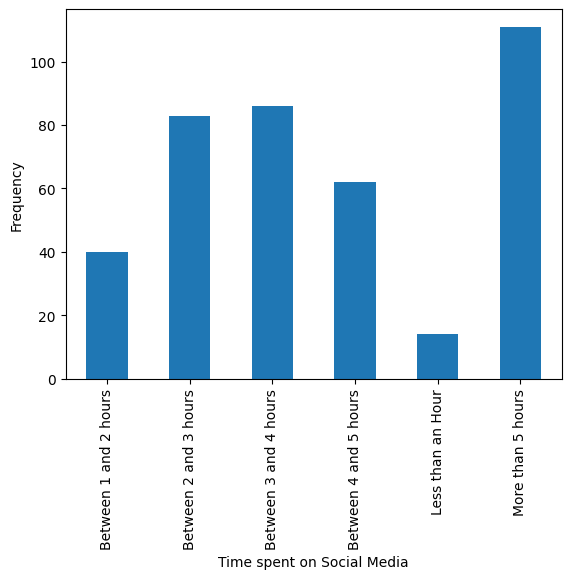

In [389]:
# Lets Understand the distribution of Data for participants and their time on Social Media 

data.groupby('Time Spent').size().plot.bar(xlabel = 'Time spent on Social Media', ylabel='Frequency')

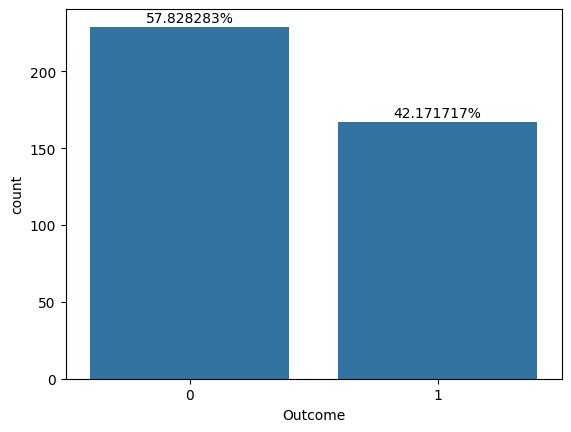

In [390]:
# Let's Understand the distribution of data for participants based on 'Outcome' - 
#whether or not the indvidual is experiencing mental health issues and therefore
#whether we recommend the individual to go and get a mental health cheak up

total = float(len(data))
ax = sns.countplot(x='Outcome', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+3,'{0:0%}'.format(height/total), ha="center")

<Axes: xlabel='Time Spent', ylabel='Mean ADHD Score'>

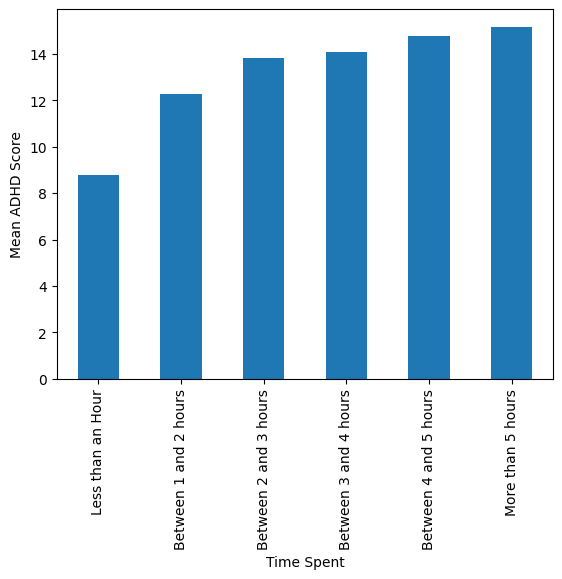

In [391]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['ADHD Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean ADHD Score')

<Axes: xlabel='Time Spent', ylabel='Mean Anxiety Score'>

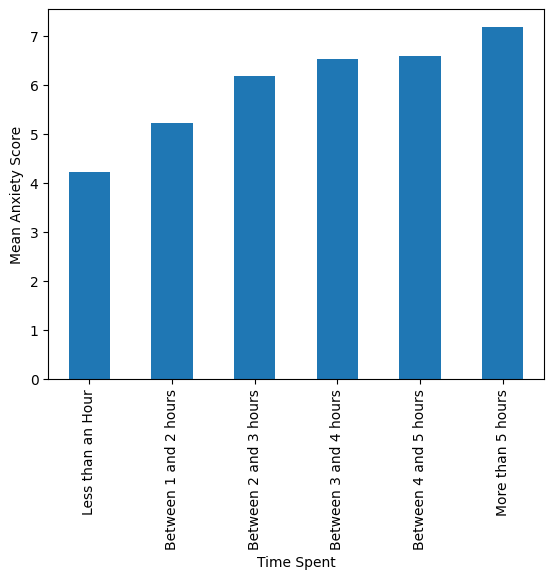

In [392]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['Anxiety Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean Anxiety Score')

<Axes: xlabel='Time Spent', ylabel='Mean Self Esteem Score'>

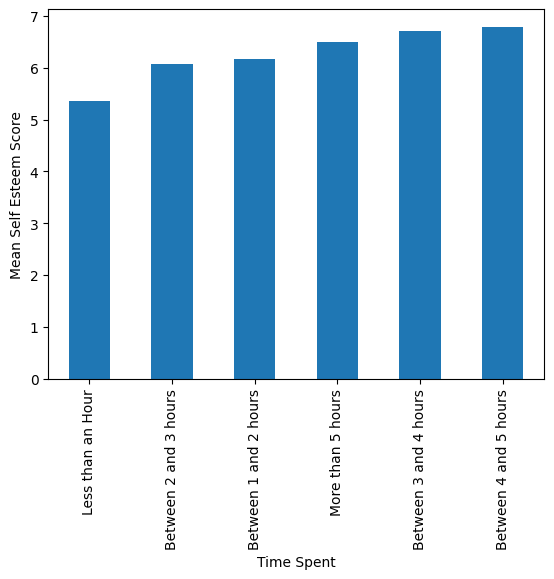

In [393]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['Self Esteem Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean Self Esteem Score')

<Axes: xlabel='Time Spent', ylabel='Mean Depression Score'>

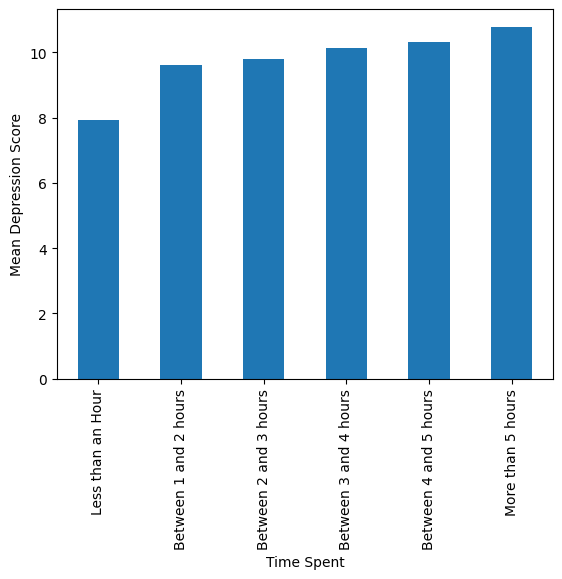

In [394]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['Depression Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean Depression Score')

<Axes: xlabel='Time Spent', ylabel='Mean Total Score'>

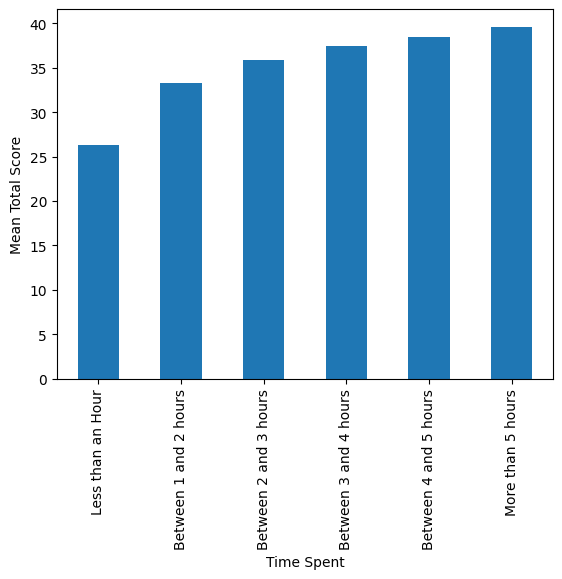

In [395]:
#Let's see the mean ADHD score of each Time group of participants
data.groupby('Time Spent')['Total Score'].mean().sort_values(ascending=True).plot.bar(ylabel = 'Mean Total Score')

In [396]:
timeSpent = set(data.get("Time Spent"))
timeSpent

{'Between 1 and 2 hours',
 'Between 2 and 3 hours',
 'Between 3 and 4 hours',
 'Between 4 and 5 hours',
 'Less than an Hour',
 'More than 5 hours'}

In [397]:
data.loc[data['Time Spent'] == 'Less than an Hour', 'Time Spent'] = 0
data.loc[data['Time Spent'] == 'Between 1 and 2 hours', 'Time Spent'] = 1
data.loc[data['Time Spent'] == 'Between 2 and 3 hours', 'Time Spent'] = 2
data.loc[data['Time Spent'] == 'Between 3 and 4 hours', 'Time Spent'] = 3
data.loc[data['Time Spent'] == 'Between 4 and 5 hours', 'Time Spent'] = 4
data.loc[data['Time Spent'] == 'More than 5 hours', 'Time Spent'] = 5

In [398]:
data['Time Spent'] = data['Time Spent'].astype('int64')

In [399]:
#setting Male to 0, Female to 1, and Others to 2.
data.loc[data['Sex'] == 'Male', 'Sex'] = 0
data.loc[data['Sex'] == 'Female', 'Sex'] = 1
data.loc[data['Sex'] == 'Others', 'Sex'] = 2
data['Sex'] = data['Sex'].astype('int64')

data.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,18,4,4,14,40,1
1,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,15,7,10,14,46,1
2,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,11,6,4,11,32,0
3,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,12,6,11,9,38,0
4,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,17,9,6,9,41,1


In [400]:
# Selecting only numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculating the correlation matrix
corr_matrix = numeric_data.corr()

# Display the correlation matrix
corr_matrix

,Age,Sex,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
Age,1.000000,0.022875,-0.059463,0.060674,0.019107,0.050031,0.012035,0.051607,0.055483
Sex,0.022875,1.000000,0.166735,0.024319,0.122525,0.127715,0.042321,0.096601,0.073385
Time Spent,-0.059463,0.166735,1.000000,0.322880,0.340774,0.079813,0.192069,0.311288,0.248851
ADHD Score,0.060674,0.024319,0.322880,1.000000,0.596395,0.227745,0.532915,0.829022,0.630199
Anxiety Score,0.019107,0.122525,0.340774,0.596395,1.000000,0.303407,0.479878,0.756817,0.591361
Self Esteem Score,0.050031,0.127715,0.079813,0.227745,0.303407,1.000000,0.273482,0.599235,0.509308
Depression Score,0.012035,0.042321,0.192069,0.532915,0.479878,0.273482,1.000000,0.774292,0.633224
Total Score,0.051607,0.096601,0.311288,0.829022,0.756817,0.599235,0.774292,1.000000,0.797219
Outcome,0.055483,0.073385,0.248851,0.630199,0.591361,0.509308,0.633224,0.797219,1.000000


In [401]:
data.head()

,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,18,4,4,14,40,1
1,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,15,7,10,14,46,1
2,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,11,6,4,11,32,0
3,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,12,6,11,9,38,0
4,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,17,9,6,9,41,1


## Predictive Model

In [402]:
# Importing Libraries

In [403]:
data.drop(data.iloc[:, 2:7], inplace = True, axis = 1)

In [404]:
data.head()

,Age,Sex,Time Spent,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Outcome
0,21,0,2,18,4,4,14,40,1
1,21,1,5,15,7,10,14,46,1
2,21,1,3,11,6,4,11,32,0
3,21,1,5,12,6,11,9,38,0
4,21,1,2,17,9,6,9,41,1


In [405]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()

In [406]:
#Splitting up the data into "Train" and "Test". 80% train, 20% test.
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']
#X = standardizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30,random_state=6)

## Logistic Regression

In [407]:
#Create Logistic regression model
model = LogisticRegression()

In [408]:
# Call LinearRegression() to predict.
model.fit(X_train, y_train)

LogisticRegression()

In [409]:
predicted= model.predict(X_test)
accuracy= model.score(X_test,y_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[69  0]
 [ 0 50]]


In [410]:
print("Predicted Values using Logistic Regression: ", predicted)

Predicted Values using Logistic Regression:  [0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 0 0 0 1 1 1 1]


In [413]:
# Model Accuracy
print('Accuracy score using the Logistic regression model: ', accuracy*100,'%')

Accuracy score using the Logistic regression model:  100.0 %
